# Objectif et démarche
#### Objectif : prédire si un Client va quitter l'entreprise 

#### Démarche en 4 étapes : 
##### 1)  Exploration des données
 - Identification de la target  
 - Dimension du DataSet et type de variables
 - Identification des valeurs manquantes
 - Identification des outliers
 - Visualisation de la target et des relations entre variables
 
#### 2) Préprocessing 
- Eliminiattion des valeures manquantes
- Création du train set / test set
- Encodage / Standardisation 

#### 3) Modélisation 
- Définir le type d'algorithme :  il s'agit ici  de classification 
- Entrainer et évaluer 11 modéles. 

#### 4) Optimisation
- Aprés la modélisation préliminaire, nous avons séléctionné les 4 modéles de classification qui avaient les scores (banlanced_accuracy, F1, et log loss) les plus performants.
- A l'aide de PCA, pipeline et de GridsearchCV nous avons essayé de trouver les paramétres optimaux pour ces 4 modéles.

# Chargement du DataSet

In [1]:
%matplotlib inline  
# pour ne pos avoir à ajouter une ligne plt.show() afin d'affciher le graph 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss, balanced_accuracy_score, f1_score,  confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split,RepeatedStratifiedKFold,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
## Exécuter pour activer le thème par défaut de Seaborn
sns.set_theme()

data=pd.read_csv("churn.csv", sep = ',', header = 0, index_col = 0)

# On fait une copie du DataSet pour éviter de le poluer
df=data.copy()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


# Etape 1 : Exploration des données¶

### - Vues d'ensemble

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 7010-BRBUU to 4795-UXVCJ
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null 

In [3]:
#Statistiques sur les varaibles quantitatives 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


**Obserations et hypothèses :**

- La donnée SeniorCitizen, est une variable catégorielle avec 2 valeures possibles ==> changement de type à prévoir  +  encodage
- La varaible TotalCharges, ne figure pas à tors dans ces stats. ==> changement de type à prévoir

In [4]:
# Identification de la target  
target_name = 'Churn'

In [5]:
# Dimension du DataSet
df.shape

(5986, 20)

object     17
int64       2
float64     1
dtype: int64


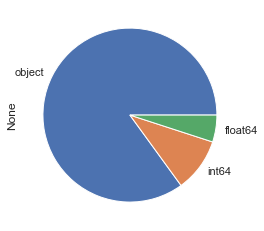

In [6]:
# Type de variables 
print(df.dtypes.value_counts());
df.dtypes.value_counts().plot.pie();

**Obserations et hypothèses :**

- La donnée SeniorCitizen, est une variable catégorielle avec 2 valeures possibles ==> changement de type à prévoir + encodage
- La variable TotalCharges, ne figure pas à tors dans ces stats. ==> changement de type à prévoir

In [7]:
# Total charges ne semble pas être au bon format ==> On va le transformer en float grace à la fonction pandas : to_numéric
df['TotalCharges']= pd.to_numeric(df['TotalCharges'] ,errors = 'coerce')

# idem pour SeniorCitizen , qui est une variaable catégorielle 
df.SeniorCitizen = df.SeniorCitizen.astype('str')  #équivalent à :df['SeniorCitizen']= df['SeniorCitizen'].astype('object')

### -  Valeures manquantes 

In [8]:
#On vérifie que cette action n'a pas révélé des données manquantes 
df.isna().sum ().sum()!=0   #Renvoie False si plus de valeure manquante

True

**Obserations et hypothèses :**

On a des données manquantes pour la variable TotalCharges. Il faudra dans la phase de préprocessing supprimer ces données.

/!\ Mais pour finaliser la phase d'Exploration du dataset, on va supprimer les données manquantes, pour éviter des erreurs dans l'appel de certaines fonctions lors des tests de correlation.

In [9]:
print("Nb enregistrements à supprimer : ", df.TotalCharges.isnull().sum())
df.dropna(inplace = True)

df.isna().sum ().sum()!=0 # Renvoie False si plus de valeure manquante

Nb enregistrements à supprimer :  10


False

### - Outliers et données catégorielles   

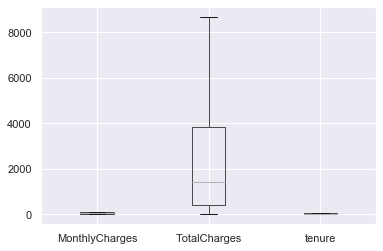

In [10]:
#On va regarder s'il ya des valeures abérantes sur les données quantitatives
filtre_Colonne = (df.select_dtypes('int64') | df.select_dtypes('float64'))
df.boxplot(column=filtre_Colonne.columns.tolist());

In [11]:
# Autre manière de le vérifier 

out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
    
# iqr_outliers(df.tenure)
iqr_outliers(df.MonthlyCharges)
iqr_outliers(df.TotalCharges)
iqr_outliers(df.tenure)

Outliers: []
Outliers: []
Outliers: []


In [12]:
#On regarde les valeurs possibles pour les données catégorielles
for colonne in df.select_dtypes('object') :print ( f'{colonne  :<20} {df[colonne].unique()}')

gender               ['Male' 'Female']
SeniorCitizen        ['0' '1']
Partner              ['Yes' 'No']
Dependents           ['Yes' 'No']
PhoneService         ['Yes' 'No']
MultipleLines        ['Yes' 'No' 'No phone service']
InternetService      ['No' 'Fiber optic' 'DSL']
OnlineSecurity       ['No internet service' 'No' 'Yes']
OnlineBackup         ['No internet service' 'Yes' 'No']
DeviceProtection     ['No internet service' 'Yes' 'No']
TechSupport          ['No internet service' 'No' 'Yes']
StreamingTV          ['No internet service' 'Yes' 'No']
StreamingMovies      ['No internet service' 'No' 'Yes']
Contract             ['Two year' 'Month-to-month' 'One year']
PaperlessBilling     ['No' 'Yes']
PaymentMethod        ['Credit card (automatic)' 'Bank transfer (automatic)' 'Electronic check'
 'Mailed check']
Churn                ['No' 'Yes']


**Observations et hypothèses :**

- Pas d'outiliers, 
- pas de valeur abérrantes ou de valeure unique, pour les variables catégorielles. 
Néanmoins encordage à prévoir.

# 

### - Visualisation de la target 

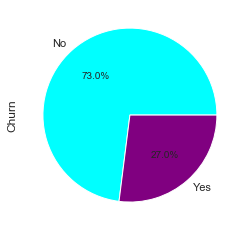

In [13]:
np.round(df[target_name].value_counts(normalize=True),2).plot.pie(autopct = lambda x: str(round(x,2)) +'%', 
                                                                  colors=['cyan','purple']);

**Observations et hypothèses :**

Les classes ne sont pas équilibrées : on a 73% de d'observations négatives et 27% de positives.

==> Conséquence : l'accuracy ne sera pas un bon indicateur de performance pour notre modéle. On préferera plutôt : la balancer_accuracy et Le Score F1.

/!\ A noter que pour entreprise, les prédictions "couteuses", portent surtout sur des FAUX NEGATIFS (FN). c.a.d : un client identifié comme Churn = No, alors qu'il va se désabonner. En effet, le modèle n'ayant pas pu l'identifier, l'entreprise perd ici sa capacité de le ratrapper en réalisant des actions de fidélisation.

On fera donc attention à la proportion de FN, lors de l'analyse des matrices de confusion.

### - Analyse des données

##### - Variables quantitatives

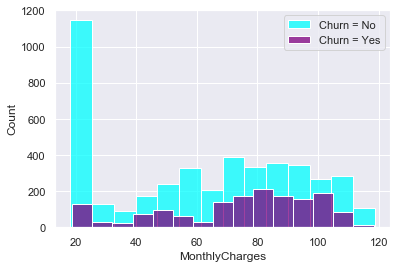

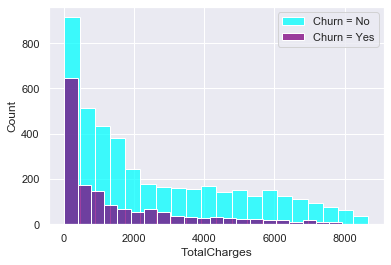

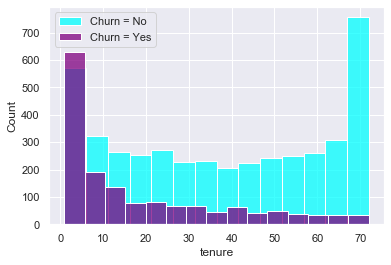

In [14]:
# visualiser les données de type Int ou Float. On filtre donc les colonnes associées : 
filtre_Colonne = (df.select_dtypes('int64') | df.select_dtypes('float64'))

for colonne in filtre_Colonne:
    plt.figure()
    sns.histplot(df[colonne][df[target_name]=='No'], label = 'Churn = No', color ='cyan')
    sns.histplot(df[colonne][df[target_name]=='Yes'], label = 'Churn = Yes', color ='purple')
    plt.legend()

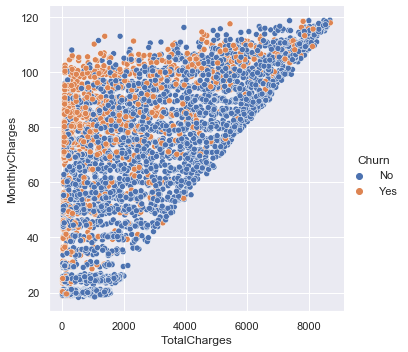

In [15]:
sns.relplot(x='TotalCharges', y='MonthlyCharges', hue='Churn', data=df);

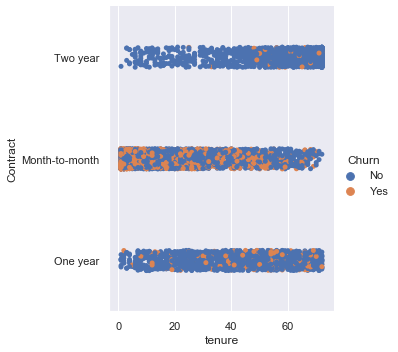

In [16]:
sns.catplot(x='tenure', y='Contract', hue='Churn' ,data=df);

**Observations et hypothèses :**


- La distribution des données traduit bien le désiquilibre des classes idéntifiées au début de l'exploration du DataSet (le cas de Client désabonné étant mal/peu représenté dans le DataSet).
- MonthlyCharges : plus ces charges augmentent, plus le CLient aurait tendance à se désabonner.
- TotalCharges : On observe  une corrélation entre l'augmentation des Charges mensuelles et les charges totales. ==> A vérifier dans les tests de corrélations comme pearsonr
- tenure : on la comprend comme l'ancienneté du Client dans l'entreprise. Cette ancienneté pouvant être liée à la durée du contrat. IL semble y avoir une corrélation entre les 2.

##### - Variables qualitatives

In [17]:
# D'abord, on va spliter notre DataSet en 3 parties  pour faciliter notre analyse
df_info_Client= df[['gender','SeniorCitizen', 'Partner', 'Dependents']]

df_info_Contrat = df[['Contract','PaperlessBilling','PaymentMethod']]

df_info_Equipement = df[['PhoneService', 'MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 
                         'DeviceProtection','TechSupport','StreamingTV','StreamingMovies' ]]

##### Observation données infos Clients : 

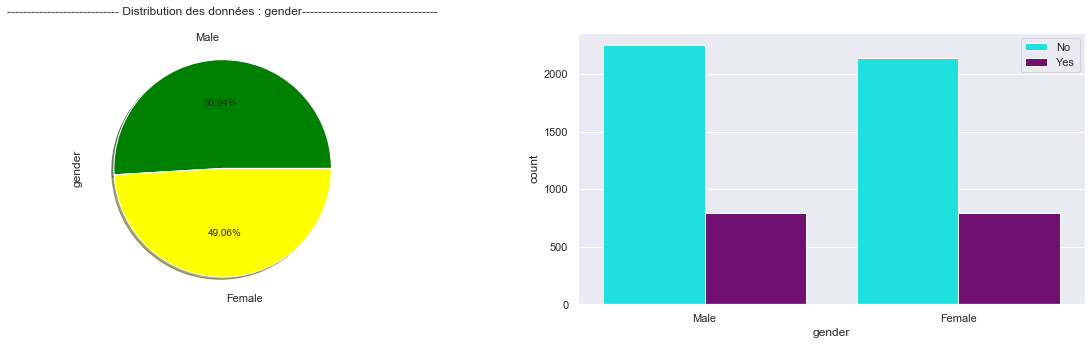

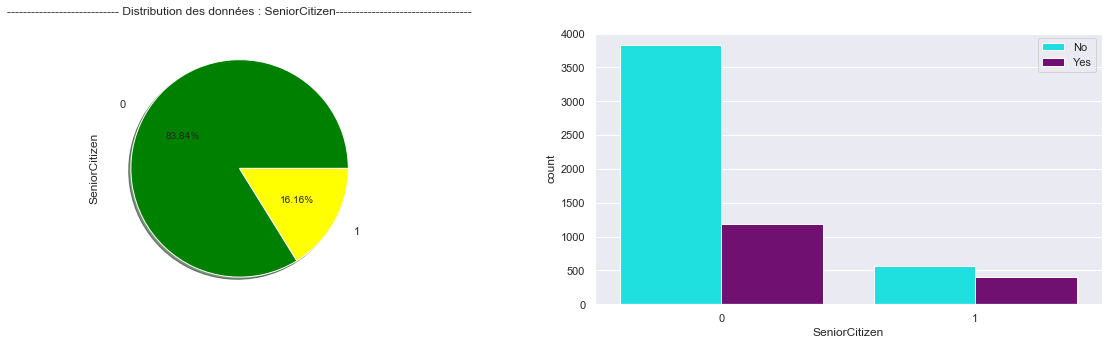

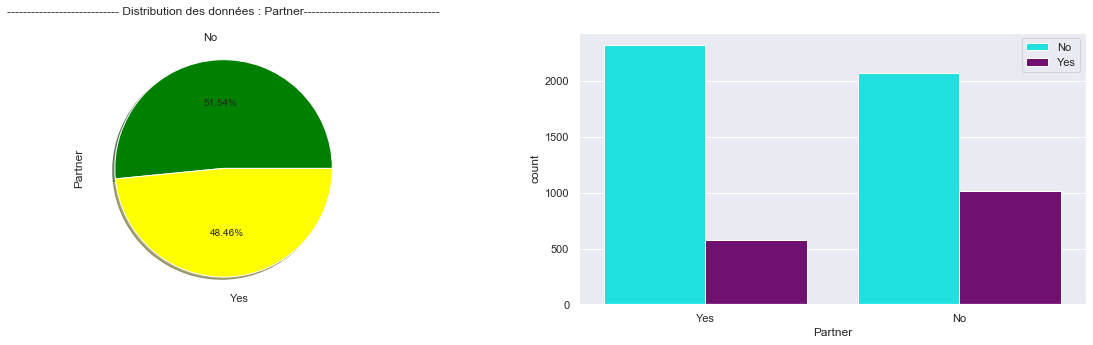

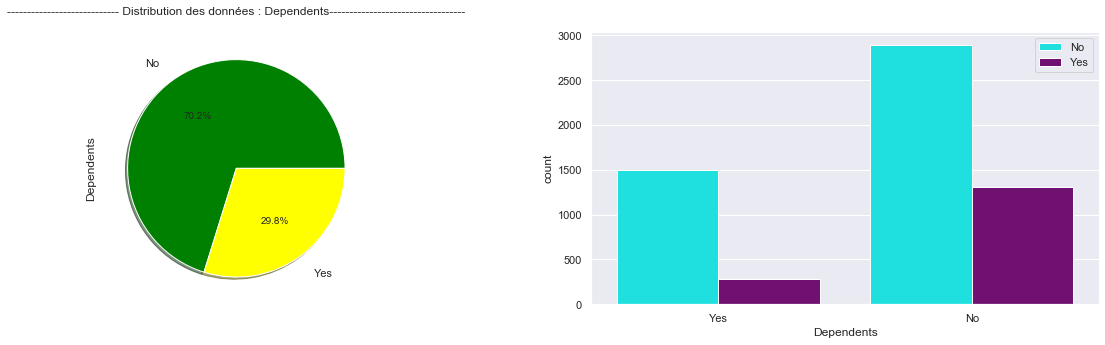

In [18]:
for colonne in df_info_Client : 
    titre = "---------------------------- Distribution des données : " + colonne + "----------------------------------\n"
    plt.figure(figsize= (20, 5) )
    plt.subplot(1, 2, 1)
    df[colonne].value_counts().plot.pie(autopct = lambda x: str(round(x,2)) +'%', 
                                        labeldistance = 1.2, shadow=True, colors=['green', 'yellow'])
    plt.title(titre)
    plt.subplot(1, 2, 2)
    sns.countplot(data = df, x=colonne, hue=target_name , palette = ['cyan', 'purple'] )  
    
    plt.legend();

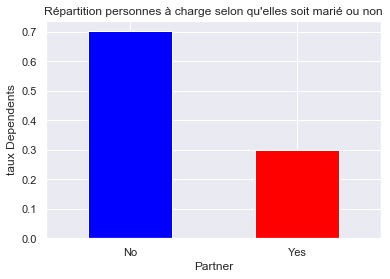

In [19]:
#ON regarde le taux de personnes à Charges, en fonction de la varible Partner: 

df['Dependents'].value_counts(normalize=True ).plot.bar(x ='Partner', rot=0, 
                                            title="Répartition personnes à charge selon qu'elles soit marié ou non",
                                            xlabel = 'Partner' , ylabel='taux Dependents', color =['blue', 'red']);


#### **Observations et hypothèses :**
- **Gender :**  la répartion homme / femme est quasi-équivalente et le genre, ne semble pas avoir d'incidence sur le niveau de Churn 
- **SeniorCitizen :**  notre Dataset comporte seulement 16% de personnes agées, contre 84% de jeunes. Il semble d'ailleurs que plus la personne est jeune, moins elle a tendance à se désabonner. Ou dit autrement, les personne agée ont endance à plus se désabonner.
- **Partner :** il y a environ 48% de clients non mariés et parmi cette population, plus de la moitié se désabonnent.
- **Dependents :** 70% des clients n'ont pas de personnes à charge (ce qui est en cohérence avec un panel plutôt jeune. On observe également que le fait de ne pas avoir de personnes à charge, peut avoir une incidence sur le désabonnement, qui augmente. En effet, parmi, ces clients, prés de la moitié ont quitté l'entreprise.

# 

##### Observation données infos Contrat : 

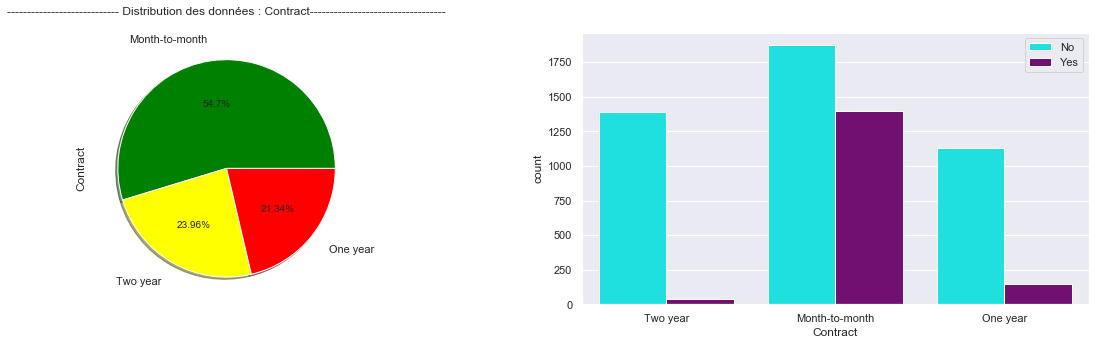

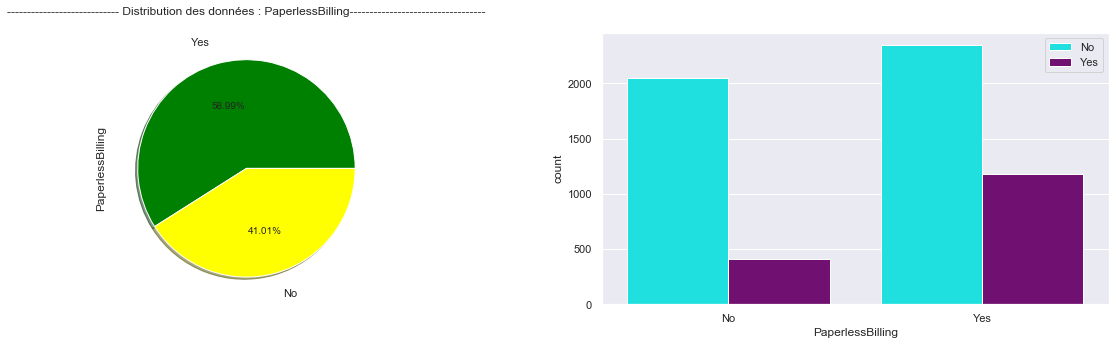

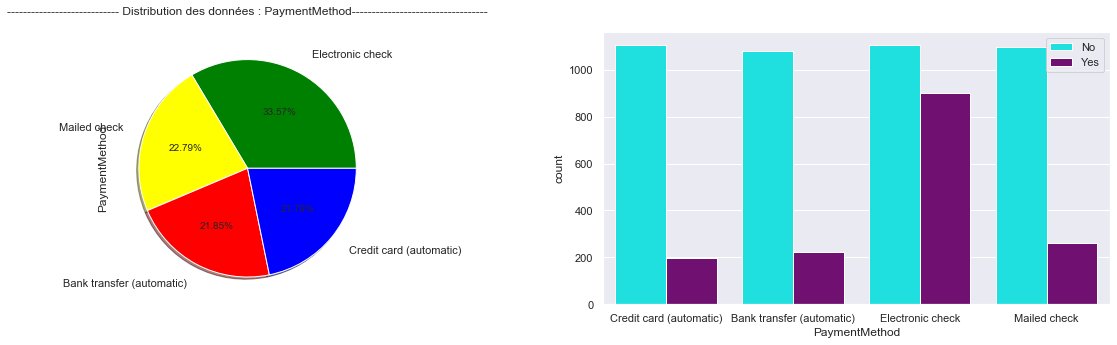

In [20]:
for colonne in df_info_Contrat: 
    titre = "---------------------------- Distribution des données : " + colonne + "----------------------------------\n"
    plt.figure(figsize= (20, 5) )
    plt.subplot(1, 2, 1)
    df[colonne].value_counts().plot.pie(autopct = lambda x: str(round(x,2)) +'%', 
                                        labeldistance = 1.2, shadow=True,colors=['green', 'yellow','red','blue'])  
    plt.title(titre)
    plt.subplot(1, 2, 2)
    sns.countplot(data = df, x=colonne, hue=target_name , palette = ['cyan', 'purple'])
    plt.legend();

#### **Observations et hypothèses :**
- **Contract :** prés de 55 %  des clients ont un contrat mensuel (i.e. :  Month-to-month). Cette catégorie de contrat semble avoir une incidence sur le désabonnement, puisqu'environ les 3/4 d'entre eux se désabonnent. Au contraire des clients disposant d'un contrat 1 an qui eux se désabonnent peu, voir quasiment pas pour les clients avec contrat de 2 ans. Ce qui est nénamoins cohérent avec la nature même de ces contrats. Si votre contrat dure 2 ans, diffcile de quitter l'entreprise durant cette période. 
- **PaperlessBilling :** les clients ayant opté pour la facturation sans papiers, sont les plus nombreux à se désabonner. 
- **PaymentMethod :** idem pour ceux qui ont opté pour le mode de paiement, Electronic check.  

##### Observation données infos Equipement : 

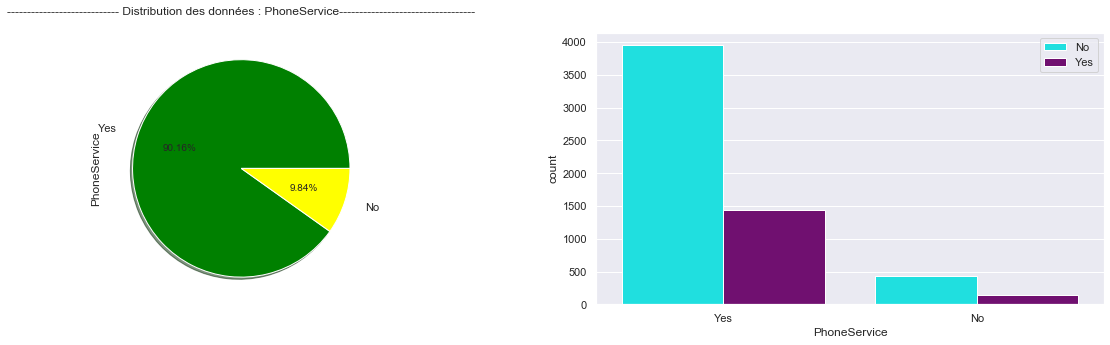

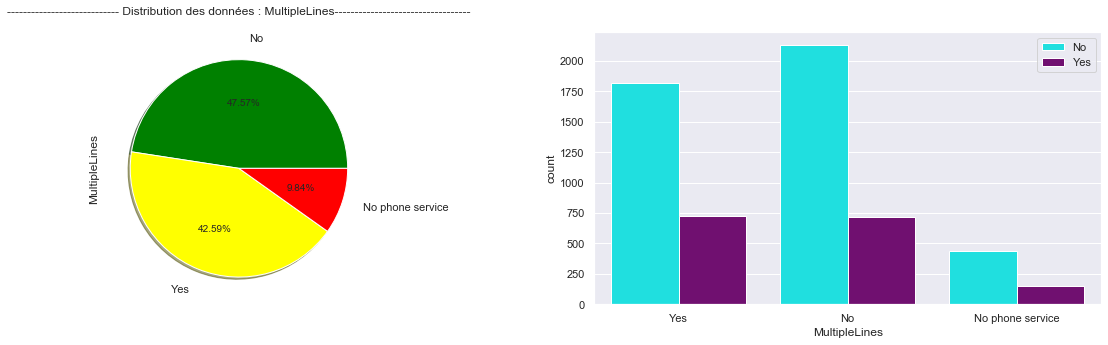

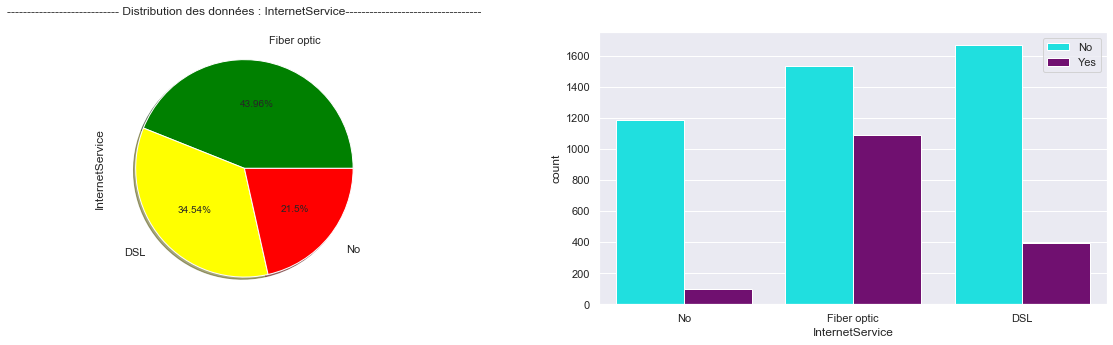

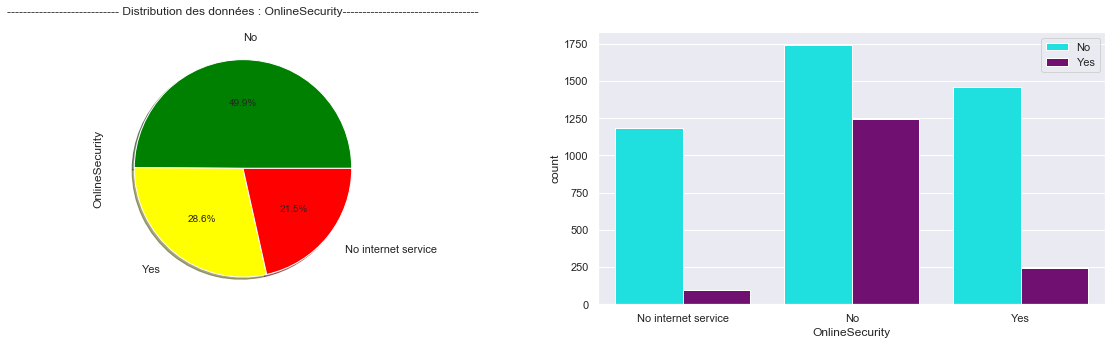

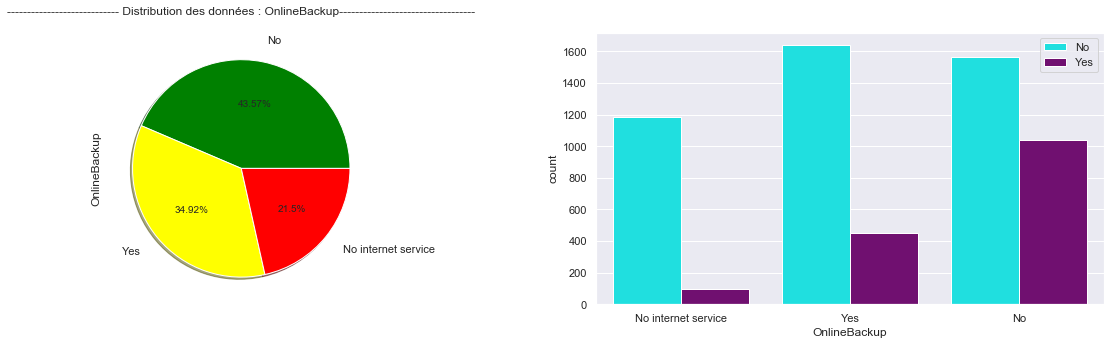

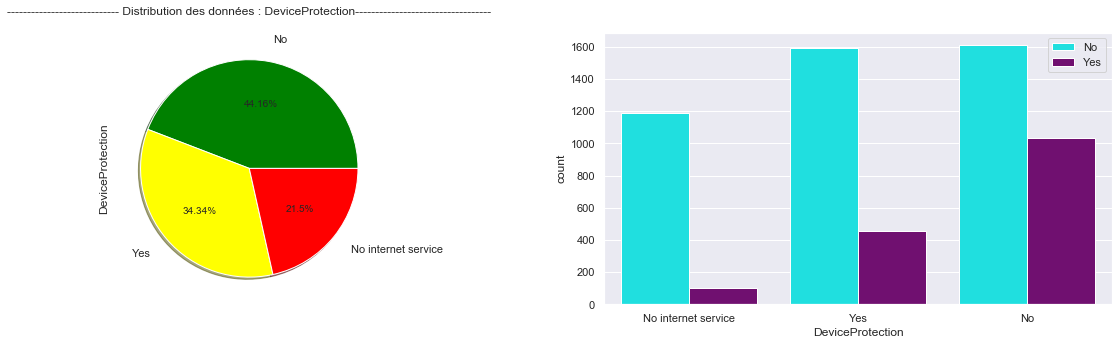

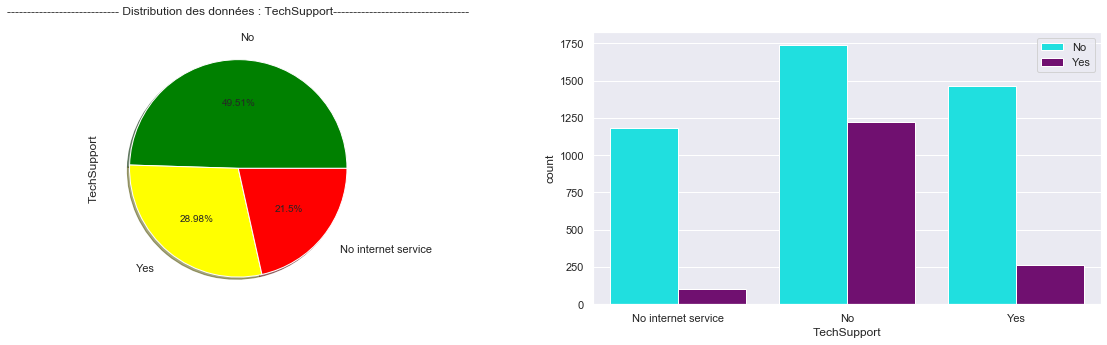

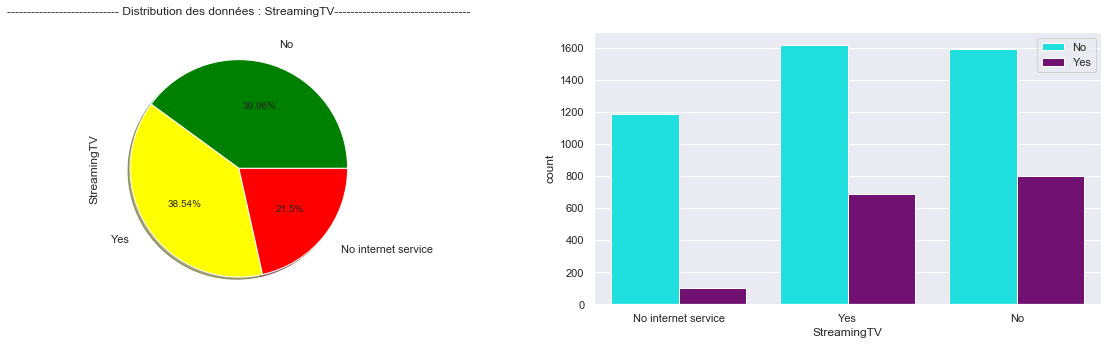

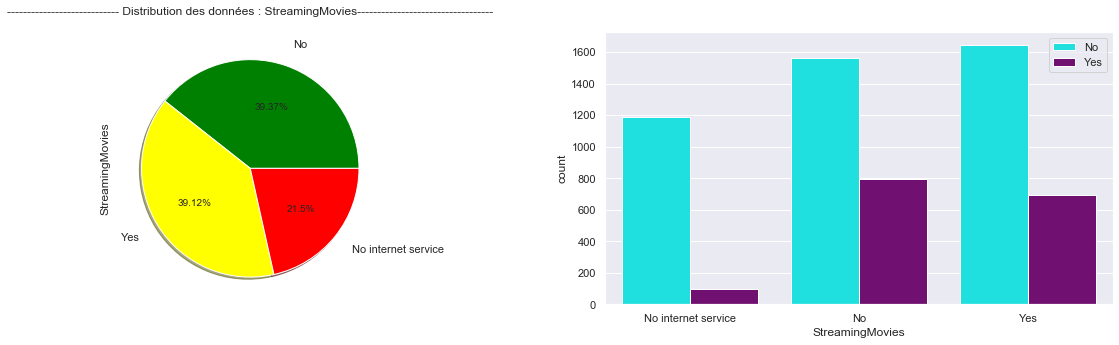

In [21]:
for colonne in df_info_Equipement: 
    titre = "---------------------------- Distribution des données : " + colonne + "----------------------------------\n"
    plt.figure(figsize= (20, 5) )
    plt.subplot(1, 2, 1)
    df[colonne].value_counts().plot.pie(autopct = lambda x: str(round(x,2)) +'%', 
                                        labeldistance = 1.2, shadow=True,colors=['green', 'yellow','red'])    
    
    plt.title(titre)
    plt.subplot(1, 2, 2)
    sns.countplot(data = df, x=colonne, hue=target_name , palette = ['cyan', 'purple'])
    plt.legend();

#### **Observations et hypothèses :**
- **MultipleLInes :** Les clients disposant de plusieurs service, ont tendance à moins se désabonner. 
- **InternetService :**  La DSL semble avoir la faveur des Clients. Ce qui est moins vrai pour la Fibre, où prés des 2/3 des clients disposant de ce service, se désabonnent. 
- **OnlineSeuriy / OnlineBackup / TechSupport / :** Idem. ou environs 2/3 des clients, non équipés se désabonnent. 
- **StreamingTV / StreaminMovies :** Les personnes non équipés se désabonnent beaucoup moins.

Il semble que moins la personne est équipée (Service Internet,  StreamingTv, StreamingMovie) moins elle a tendance à se désabonner.
A l'inverse, les Clients disposant d'internet via la Fibre, ont tendances à plus se désabonner.
Enfin, les Clients disposant du service internet, ont tendance à se désabonnent lorsqu'ils ne dispoent pas de services d'accomagnement (onlineSeuriy / OnlineBackup / TechSupport);


### On va vérifier les correlations

In [22]:
def init (df) : 
    """
    Cette fonction va : 
     - faire une copie du DataFrame reçu en paramétre, 
     - modifier les type des variables TotalCharges et SeniorCitizen
     - supprime la colonne ID
     - supprimer les valeures manquantes  
    
    La fonction renvoie un DataFrame avec les données du Dataset avec les modifications susvisées
    """
    
    df=data.copy()
    
    df['TotalCharges']= pd.to_numeric(df['TotalCharges'] ,errors = 'coerce')
    df.SeniorCitizen = df.SeniorCitizen.astype('str') 
  
    df= df.reset_index(drop=True)
    df.dropna(inplace = True)
    
    return df

In [23]:
df=init(data)

In [24]:
# Avant, on va utiliser ces fonctions d'encodage pour visualiser les corrélatio selon la valeur de la Target
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(df)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,72,24.10,1734.65,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
1,44,88.15,3973.20,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,38,74.95,2869.85,1,1,0,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
3,4,55.90,238.50,0,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,2,53.45,119.50,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0


###### - Tests de correlations entre les variables  

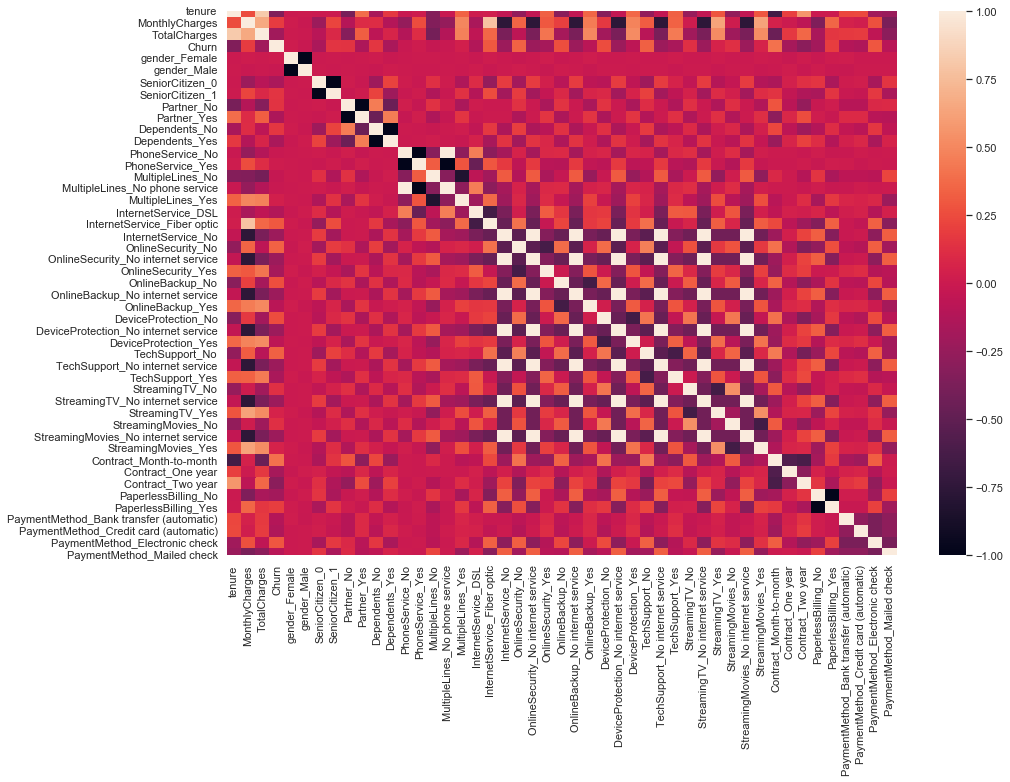

In [25]:
#Vue d'ensemble 
plt.figure(figsize=(15,10))
sns.heatmap(df_dummies.corr());

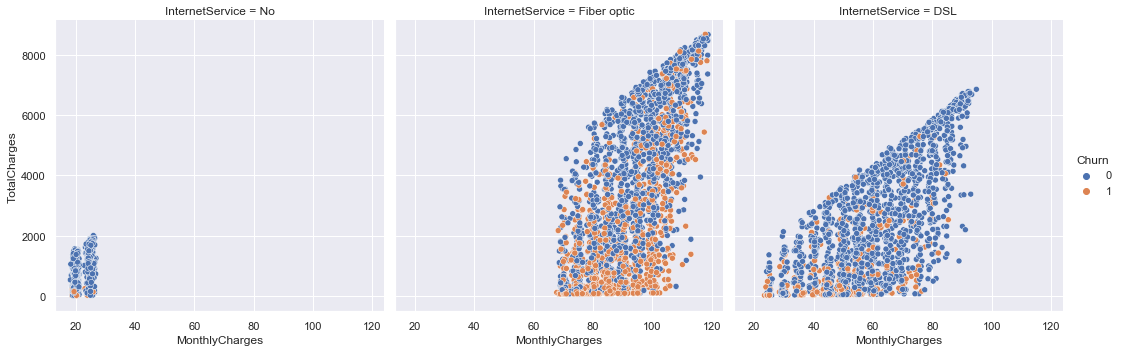

In [26]:
sns.relplot(x='MonthlyCharges', y ='TotalCharges' , hue = 'Churn', col='InternetService', data=df,  ci=None); 

#### **Observations et hypothèses :**

Les graphes confirment les correlations supposées lors de la phase d'observation des données : 
 - l'ancienneté (tenure) du contrat est corrélée au type de contrat. 
 - les Charges mensuelles, sont corrélées aux services souscrits, en particulier : Fibre, StreaminTv, StreamingMovies  
 - correlation entre la situation matrimoniale (Partner) et le fait d'avoir des personnes à charge.
 

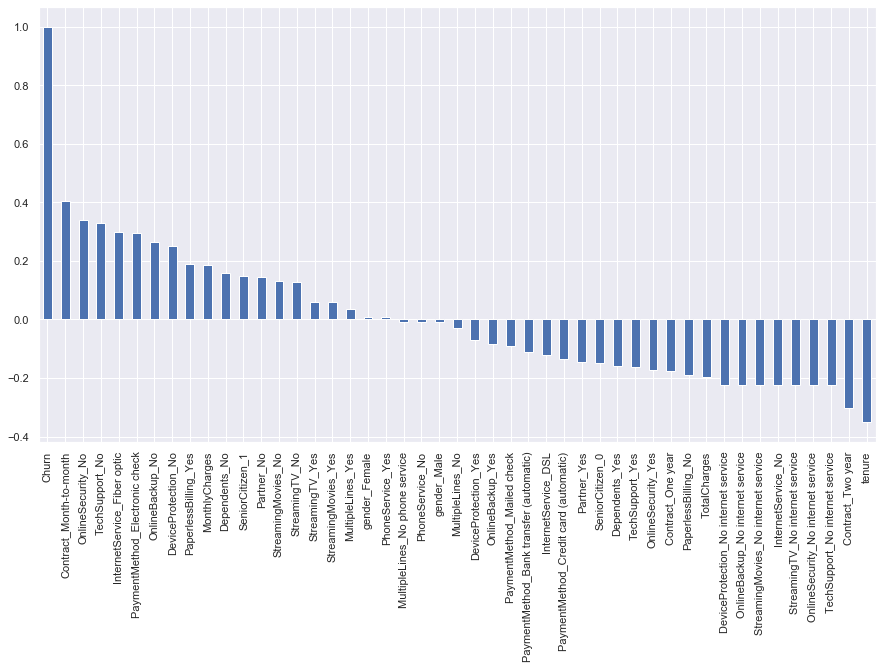

In [27]:
# En faisant un focus sur les corrélations autour de la target

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

**Observations et hypothèses :** 

On peut assui confirmer scientifiquement ces observations, avec le test de pearson. (On va le faire pour un couple de variables uniquement : Contract_Two/tenure)

En considérant que l'Hypothèse nulle : Les deux variables testées sont indépendantes. 
On constate que la p-value calculée ici est trés petite. 
==> La probabilité de faire une erreur en rejetant l'hypothèse nulle est donc faible.

In [28]:
pd.DataFrame(pearsonr(df_dummies['tenure'], df_dummies['Contract_Two year']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

,resultat_test
pearson_coeff,0.564137
p-value,0.000000


# 

# Etape 2 : Préprocessing 

#### Maintenant qu'on a exploré les données, on va préparer les fonctions d'encodage et de standardiastion qui vont servir au Préprocessing et Modélisation

In [29]:
def Standardiser (df) :
    
    """
    Cette fonction  va standardiser les données quantitatives du DataFrame reçu en paramétre
    /!\ Il faut penser à appeler cette fonction, avant de faire l'encodage,
    qui va transformer varaibles les varaibles catégorielles en numériques !!!
    
    Les variables impactées, sont listées.
    La fonction renvoie un DataFrame avec les données du Dataset standardisées.
    """
    
    from sklearn.preprocessing import StandardScaler

    filtre_name_Colonne = df.select_dtypes(['float64', 'int64']).columns      
    print ("Variable(s) standardisée(s) :" , filtre_name_Colonne.tolist())
    f_stand = StandardScaler()
    df[filtre_name_Colonne] = f_stand.fit_transform(df[filtre_name_Colonne])
    return df


def Encoder (df) :   
    """
    Cette fonction  va encoder les variables catégorielles du DataFrame reçu en paramétre.
    Les variables impactées, sont listées.
    La fonction renvoie un DataFrame avec les données du Dataset encodées.
    """
    
    from sklearn.preprocessing import OrdinalEncoder
    
    filtre_name_Colonne = df.select_dtypes('object').columns   
    print ("Variable(s) encodée(s) :" , filtre_name_Colonne.tolist())
    f_encode = OrdinalEncoder()
    df[filtre_name_Colonne] = f_encode.fit_transform(df[filtre_name_Colonne])
    return df

##### - On crée notre trainSet et testSet

In [30]:
#On repart d'une nouvelle copie du DataSet 
df=init(data)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


# 

# Etape 3 : Modélisation 
## Test préliminaire de 11 modèles de classifications :
- KNeighborsClassifier,
- SVC,
- NuSVC,
- DecisionTreeClassifier,
- RandomForestClassifier,
- AdaBoostClassifier,
- GradientBoostingClassifier,
- GaussianNB,
- LinearDiscriminantAnalysis,
- QuadraticDiscriminantAnalysis,
- LogisticRegression.

In [31]:
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

##### a)  On fait une copie du DataSet pour éviter de le poluer

In [32]:
df = init(data)

X= df.drop('Churn', axis=1)
y= df['Churn']

X = Standardiser(X)
X = Encoder(X)

le = LabelEncoder().fit(y) 
y = le.transform(y)

Variable(s) standardisée(s) : ['tenure', 'MonthlyCharges', 'TotalCharges']
Variable(s) encodée(s) : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


##### b)  On crée nos Train_set, Test_set (i.e. :  pas de crossavalidation dans un premier temps)

In [33]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=23)

# Provides train/test indices to split data in train/test sets.
# StratifiedShuffleSplit object is a merge of StratifiedKFold and ShuffleSplit, 
# which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.
# Les folds sont réalisés en conservant le pourcentage d'échantillons pour chaque classe.

# c'est Kfold avec shuffle true et StratifiedKFold combiné

# split(X, y) Generate indices to split data into training and test set.

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]

##### c)  On instancie nos modéles (tous les modlées de classification qui existe!)

In [34]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
LogisticRegression(solver="newton-cg")]


##### c)  On va maintenant évaluer la performance de chaque modéle avec 3 métriques : 
- **La balanced_accuracy**
- **Le score F1** 

On a vu lors de la phase d'Exploration des données, qu'eu égard aux désiquilibre des classes dans le dataset, on devait prévillégier ces métriques.

A ces métriques, on va également ajouter le **Log-Loss**.

A prévoir peut-être également, le **Recall**. En effet, on a vu plus haut que ce qui coute chere à l'entreprise c'est des FAUX NEGATIFS. Ca peut êre interessant d'avoir le Rappel pour juger de l'impact coût pour l'entreprise qui déploie le modele.


**Mémo sur le Log-Loss**: 

Log-Loss indique à quel point la probabilité de prédiction est proche de la valeur réelle/vraie correspondante(0 ou 1 en cas de classification binaire). 
Plus la probabilité prédite s'écarte de la valeur réelle, plus la valeur de perte logarithmique est élevée.

Proba(model_predict) = [0.8, 0.4, 0.1] => label_realité = [1,1,0]  
Il existe une règle de probabilité selon laquelle la probabilité de plusieurs événements indépendants est le produit de leurs probabilités individuelles.

Proba(model_predict) = [0.8, 0.4, 0.1] => label = [1,1,0] => 0.8*0.4*(1-0.1)

=> On prend le log de ce produit car si on multiplie suffisamment de nombres dans cette plage, le résultat devient si petit que les ordinateurs ne peuvent pas le compter.

Proba(model_predict) = [0.8, 0.4, 0.1] => label = [1,1,0] => log(0.8*0.4*(1-0.1)) => log(a*b) = log a + log b

=> 1*log(8)+1*log(4)+(1-0)*log(1-0.1)

Regle général =>  Llog(y,p)=-(ylog(p)+(1-y)log(1-p))

Le signe moin(-) c'est pour maintenir une convention commune selon laquelle les scores de perte inférieurs sont meilleurs.

In [35]:
# Logging pour comparaison visuelle
log_cols=["Classifier", "Balanced Accuracy", "Log Loss","F1 Score"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    test_predictions = clf.predict(X_test) # calcul des predictions sur le jeu de test
    acc = balanced_accuracy_score(y_test, test_predictions) 
    f1 = f1_score(y_test, test_predictions)
    print("\nBalanced Accuracy: {:.4%}".format(acc))
    print("F1 Score: {}".format(f1))
    
    test_predictions = clf.predict_proba(X_test) # calcul des proba model sur le jeu de test
    ll = log_loss(y_test, test_predictions)
    print("Log Loss: {}".format(ll), "\n")
    
    log_entry = pd.DataFrame([[name, acc*100, ll,f1]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****

Balanced Accuracy: 66.9134%
F1 Score: 0.5134843581445523
Log Loss: 3.5952402323168706 

SVC
****Results****

Balanced Accuracy: 53.9650%
F1 Score: 0.15589353612167298
Log Loss: 0.45153348208628163 

NuSVC
****Results****

Balanced Accuracy: 65.4970%
F1 Score: 0.48143053645116923
Log Loss: 0.4524129131590696 

DecisionTreeClassifier
****Results****

Balanced Accuracy: 64.1546%
F1 Score: 0.47401247401247404
Log Loss: 9.72887553759014 

RandomForestClassifier
****Results****

Balanced Accuracy: 68.4395%
F1 Score: 0.5372405372405372
Log Loss: 0.4930173222528316 

AdaBoostClassifier
****Results****

Balanced Accuracy: 71.8388%
F1 Score: 0.5929411764705883
Log Loss: 0.6743078147769093 

GradientBoostingClassifier
****Results****

Balanced Accuracy: 71.1478%
F1 Score: 0.583232077764277
Log Loss: 0.40759648957663136 

GaussianNB
****Results****

Balanced Accuracy: 74.4678%
F1 Score: 0.611111111111111
Log Loss: 0.8296495584037039 

LinearDiscriminantAnalysi

#### c) Analyse des résultats et choix des modéles à optimiser

Lorsque nous sommes confrontés à des problématiques de classification, la stratégie de stratif k-fold classification est préférée à au k-fold cross validation "classique". C'est pour cette raison qu'on a choisi StratifiedShuffleSplit(c'est Kfold avec shuffle true et StratifiedKFold combiné). On a fait une cross validation sur tous les modèles ci-dessous pour choisir le modele meilleur.

Sachant que dans notre cas, un modele est considéré comme "optimal" lorsqu'il combine :
- une balanced Accuracy la plus élévée
- un score F1, le plus élevée
- et un faible Log Loss

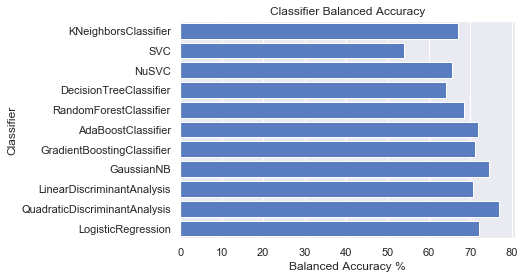

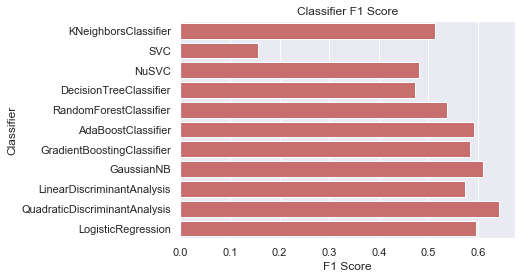

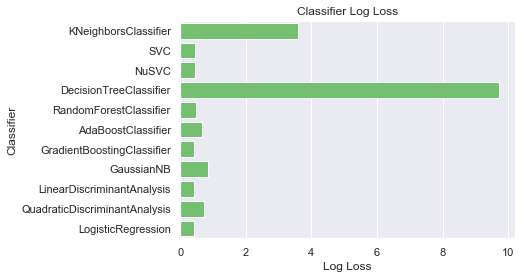

In [36]:
sns.set_color_codes("muted")
sns.barplot(x='Balanced Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Balanced Accuracy %')
plt.title('Classifier Balanced Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='F1 Score', y='Classifier', data=log, color="r")

plt.xlabel('F1 Score')
plt.title('Classifier F1 Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

**Conclusions :** 
Les algorithmes qui semblent être les plus performants et qu'on va par la suite, essayer d'optimiser :
- **LogisticRegression**
- **GradientBoostingClassifier**
- **RandomForestClassifier**
- **KneighborsClassifier**


# 

# Etape 4 : Optimisation des modéles

## 1) LogisticRegression (plusieurs pistes étudiées) 

### a) LogisticRegression - Choix de seuil 

Dans un problème de classification binaire, le classifier.predict() de scikit utilise-t-il 0.5 par défaut.

On a deux classes déséquilibres, est-ce qu'il faut changer ce seuil? 
Est-ce qu'une classe est plus probable par rapport à l'autre? 

Ici on va Chercher un seuil pour diminuer au max les FAUX NEGATIFS, car c'est ce qui est couteux pour l'entreprise 
En phase de décision du modèle il faut augmenter ou diminuir ce seuil Pr(y=1)>0.5 ?

In [37]:
# On fait une copie du DataSEt pour éviter de le poluer
df=init(data)

X= df.drop('Churn', axis=1)
y= df['Churn']

X = Standardiser(X)
X = Encoder(X)

le = LabelEncoder().fit(y) 
y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)


Variable(s) standardisée(s) : ['tenure', 'MonthlyCharges', 'TotalCharges']
Variable(s) encodée(s) : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [38]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train);

In [39]:
pred_proba_df = pd.DataFrame(logreg.predict_proba(X_test))

**pred_proba_df** est une dataframe qui contient tous les proba d'appartenir à :
- la classe 1(churn='yes') 
- ou à la classe 0(churn='no') 
de notre jeu de test

Il a deux colonne Pr(classe = 0), Pr(classe = 1)

In [40]:
#ON va faire des prédictions manuelle en fonction de différentes valeur pour le seuil threshold

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]

for seuil in threshold_list:
    print ('\n******** Pour seuil = {} ******'.format(seuil))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>seuil else 0) # si la proba > seuil => y_pred = 1
    test_accuracy = balanced_accuracy_score(y_test, Y_test_pred.iloc[:,1])
    
    print('Notre balanced accuracy est de: {}'.format(test_accuracy))
    print(confusion_matrix(y_test,Y_test_pred.iloc[:,1]))


******** Pour seuil = 0.05 ******
Notre balanced accuracy est de: 0.6528211698615286
[[456 882]
 [ 16 439]]

******** Pour seuil = 0.1 ******
Notre balanced accuracy est de: 0.7072726227434748
[[637 701]
 [ 28 427]]

******** Pour seuil = 0.15 ******
Notre balanced accuracy est de: 0.7277846219550255
[[736 602]
 [ 43 412]]

******** Pour seuil = 0.2 ******
Notre balanced accuracy est de: 0.7468240279899473
[[834 504]
 [ 59 396]]

******** Pour seuil = 0.25 ******
Notre balanced accuracy est de: 0.7537089965341086
[[923 415]
 [ 83 372]]

******** Pour seuil = 0.3 ******
Notre balanced accuracy est de: 0.7494719032835624
[[994 344]
 [111 344]]

******** Pour seuil = 0.35 ******
Notre balanced accuracy est de: 0.7527497166510619
[[1041  297]
 [ 124  331]]

******** Pour seuil = 0.4 ******
Notre balanced accuracy est de: 0.737786428817819
[[1098  240]
 [ 157  298]]

******** Pour seuil = 0.45 ******
Notre balanced accuracy est de: 0.7315699995072192
[[1149  189]
 [ 180  275]]

******** Po

**Conclusion:** 

On a entrainé notre modele sur un jeu de données déséquilibrées, on a plus de "No" que des "Yes'

En sachant que notre jeu de test, lui aussi est déséquilibré on note que:
- à des valeurs des seuils petits correspondent des valeurs plus importantes des VP et FN(trop!!) par rapport aux VN et FP
- on a des bon valeurs d'accuracy pour des seuils entre environ 0.2 et 0.55
- à mesure qu'on grandit le seuil (et surtout pour des valeurs > 0.55  ): les VP et FN diminuent beaucoup par rapport aux VN et FP et la balanced accuracy commencé à dégrader à manier évident

### b) LogisticRegression - Hyperparameter tuning pour avec Gridsearch

In [41]:
# On fait une copie du DataSEt pour éviter de le poluer
df=init(data)

X= df.drop('Churn', axis=1)
y= df['Churn']


X = Standardiser(X)
X = Encoder(X)

le = LabelEncoder().fit(y) 
y = le.transform(y)


Variable(s) standardisée(s) : ['tenure', 'MonthlyCharges', 'TotalCharges']
Variable(s) encodée(s) : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [42]:
lr = LogisticRegression()

# Repeats Stratified K-Fold n times with different randomization in each repetition.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [43]:
param_l2 = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000], 
         'solver':['newton-cg', 'lbfgs', 'liblinear','saga']}

param_l1 = {'penalty': ['l1'], 'C': [0.001,0.01,0.1,1,10,100,1000], 
         'solver':['liblinear','saga']}

In [44]:
logreg_cv_l2 = GridSearchCV(lr,param_l2,cv=cv,scoring='balanced_accuracy')
logreg_cv_l1 = GridSearchCV(lr,param_l1,cv=cv,scoring='balanced_accuracy')

In [45]:
logreg_cv_l1.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
             scoring='balanced_accuracy')

In [46]:
print("tuned hpyerparameters l1 :(best parameters) ",logreg_cv_l1.best_params_)
print("balanced accuracy :",logreg_cv_l1.best_score_)

tuned hpyerparameters l1 :(best parameters)  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
balanced accuracy : 0.7155800926618361


In [47]:
logreg_cv_l2.fit(X_train,y_train)
print("tuned hpyerparameters l2 :(best parameters) ",logreg_cv_l2.best_params_)
print("balanced accuracy :",logreg_cv_l2.best_score_)

tuned hpyerparameters l2 :(best parameters)  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
balanced accuracy : 0.7155800926618361


- Conclusion: On trouve que aprés avoir crée des K-Fold avec RepeatedStratifiedKFold(Répétitions stratifiées K-Fold n fois avec une randomisation différente à chaque répétition) on trouve que les meilleur performances on les obtient avec:


    - 'C': 10, 'penalty': 'l1', 'solver': 'liblinear'
    - 'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'

En phase d'implementation du modèle il faut choisir celui qui s'exécute plus rapidement. 

### c) LogisticRegression - Pipeline avec preprocessing et PCA 

- Démarche: essayer avec une autre methode

    -On charge le dataframe, labelencode le target. 
    
    -On fait une train_test_split standard.
    
    -Créer une Pipeline qui consiste en trois step:
    
       -Standardiser nos variables numériques avec StandardScaler et transformer nos variables catégorielles avec 
       OneHotEncoder(avant on avait utilisé OrdinalEncoder c'est une des steps qui rend different cette approche
       par rapport aux approches vues avant)
       -PCA
       -Regression logistique
       
     -Gridsearch pour optimiser les parametres de la PCA et Regression logistique pour obtenir le score optimal(balanced_accuracy)

In [41]:
# On fait une copie du DataSEt pour éviter de le poluer
df=init(data)

X= df.drop('Churn', axis=1)
y= df['Churn']

le = LabelEncoder().fit(y) 
y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [42]:
# Pipeline pour standardiser les variables numeriques avec StandardScaler()
numeric_features = ['TotalCharges', 'MonthlyCharges','tenure']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Pipeline pour encoder les variables categorielles
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
categorical_transformer = OneHotEncoder(drop='first',handle_unknown='ignore')

# preprocessor: transforme notre jeu de données avec les variables numériques standardisé 
#et les variables catégorielles encodées

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [50]:
# Nous utilisons également l'analyse en composantes principales (PCA) qui réduira la dimension des variables 
# en créant de nouvelles variable qui ont la plupart de la variance des données d'origine.
# on laisse gridsearch trouver le nombre de composantes optimale qui permet d'obtenir le score meilleure(balanced_accuracy)

pca = PCA()

n_components = list(range(1,X.shape[1]+1,1)) # entre 1 et nombre des variable de X

C = np.logspace(-4, 4, 50)

param_grid = [
  {'penalty': ['l1'], 'solver': ['saga','liblinear']},
  {'penalty': ['l2'], 'solver': ['newton-cg','lbfgs','saga','sag','liblinear']},
 ]


In [51]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('pca', pca),
                      ('logistic_Reg', LogisticRegression())])

parameters_l1 = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=param_grid[0]['penalty'],
                 logistic_Reg__solver = param_grid[0]['solver'] )

parameters_l2 = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=param_grid[1]['penalty'],
                 logistic_Reg__solver = param_grid[1]['solver'] )

clf_GS = GridSearchCV(pipe, parameters_l1 , n_jobs=-1, scoring='balanced_accuracy')
clf_GS

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'MonthlyCharges',
                                                                          'tenure']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['gender',
       

#### Hyperpametres tuning penalty l1 de la regression logistique

On cherche les parametres meilleures pour penalty l1:

In [52]:
clf_GS = GridSearchCV(pipe, parameters_l1 , n_jobs=-1, scoring='balanced_accuracy')
clf_GS.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'MonthlyCharges',
                                                                          'tenure']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['gender',
       

In [53]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l1
Best C: 0.0013894954943731374
Best Number Of Components: 2

LogisticRegression(C=0.0013894954943731374, penalty='l1', solver='liblinear')


In [54]:
print("Best: %f using %s" % (clf_GS.best_score_, clf_GS.best_params_))

Best: 0.729376 using {'logistic_Reg__C': 0.0013894954943731374, 'logistic_Reg__penalty': 'l1', 'logistic_Reg__solver': 'liblinear', 'pca__n_components': 2}


In [55]:
print("model score: %.3f" % clf_GS.score(X_test, y_test))

model score: 0.730


- Conclusion : pour penalty L1 les meilleures parametres on les obtient avec:

In [56]:
print("Best: %f using %s" % (clf_GS.best_score_, clf_GS.best_params_))

Best: 0.729376 using {'logistic_Reg__C': 0.0013894954943731374, 'logistic_Reg__penalty': 'l1', 'logistic_Reg__solver': 'liblinear', 'pca__n_components': 2}


Avec une balanced accuracy d'environ 73% .

#### Hyperpametres tuning penalty l2 de la regression logistique

On cherche les parametres meilleures pour penalty l2:

In [57]:
clf_GS = GridSearchCV(pipe, parameters_l2 , n_jobs=-1, scoring='balanced_accuracy')
clf_GS.fit(X_train,y_train)


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'MonthlyCharges',
                                                                          'tenure']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['gender',
       

In [58]:
print("Best: %f using %s" % (clf_GS.best_score_, clf_GS.best_params_))

Best: 0.734893 using {'logistic_Reg__C': 0.00021209508879201905, 'logistic_Reg__penalty': 'l2', 'logistic_Reg__solver': 'liblinear', 'pca__n_components': 19}


In [59]:
print("model score: %.3f" % clf_GS.score(X_test, y_test))

model score: 0.733


- Conclusion : pour penalty L2 les meilleures parametres on les obtient avec:

In [60]:
print("Best: %f using %s" % (clf_GS.best_score_, clf_GS.best_params_)) 

Best: 0.734893 using {'logistic_Reg__C': 0.00021209508879201905, 'logistic_Reg__penalty': 'l2', 'logistic_Reg__solver': 'liblinear', 'pca__n_components': 19}


Avec une balanced accuracy d'environ 73,3% .

On obtient des scores similaires soit si on choisit comme penalty l1 ou l2.(score l2 légèrement supérieur)
  Par contre le nombre de composantes optimales PCA est de 19 pour l2, contre seulement 2 pour l1.
  Avec penalty l1 considérer que 2 composantes permettent d'obtenir déjà le score optimal.

#### Graphique expliquative pour Gridsearch LOGREG avec les parametres l2

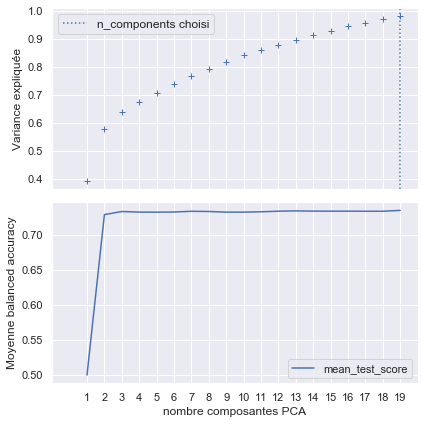

In [61]:

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))

liste=[]

# On crée donc une boucle au sein de laquelle la somme de la variance expliquée pour chaque nombre de 
# dimensions choisi va être calculée
scaler = StandardScaler()

for i in range(1,20):
    
    pca = PCA(n_components=i)
    pca.fit(preprocessor.fit_transform(X))
    liste.append(sum(pca.explained_variance_ratio_))
    
ax0.plot(np.arange(1,20),liste, '+',linewidth=2 )
    
# On définit les graduations de l'axe des abscisses pour que ce soit des entiers 

# On définit le titre et le nom des axes du graphique

ax0.axvline(clf_GS.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components choisi')


ax0.set_xlabel("Nombre de dimensions")

ax0.set_ylabel("Variance expliquée")

ax0.legend(prop=dict(size=12))



# For each number of components, find the best classifier results
results = pd.DataFrame(clf_GS.cv_results_)
best_clfs = results[['mean_test_score','param_pca__n_components',
                     'std_test_score']].groupby('param_pca__n_components').apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x = 'param_pca__n_components' , y='mean_test_score', ax=ax1)#yerr='std_test_score')

ax1.set_ylabel('Moyenne balanced accuracy')
ax1.set_xlabel('nombre composantes PCA')

ax1.set_xticks(np.arange(1, 20, step=1))

plt.xlim(-1, 20)

plt.tight_layout()
plt.show();

# Gridsearch return la valeur optimale des nombres de composantes qui rend optimal le score(balanced accuracy).


# 2) Optimisation - GradientboostingClassifier 

Une autre modèle qu'on a étudié est le GradientboostingClassifier.
  Pour cela on peut faire aussi une Gridsearch pour le tuning de tous les parametres qui rend optimal le score: balanced_accuracy.
  Ce modele est caractérisé par beaucoup des paramètres, et les temps de calculs pour obtenir les meilleures de ceux-ci s'allongent.
  **Donc on a décidé de faire une analyse plus approfondie de chaque paramètre qui caractérise ce modèle.**
  



- Le boosting de gradient est un type de boosting d’apprentissage de la machine. 
Il repose fortement sur la prédiction que le prochain modèle réduira les erreurs de prédiction lorsqu’il sera mélangé avec 
les précédents. L’idée principale est d’établir des résultats cibles pour ce prochain modèle afin de minimiser les erreurs.
Vous pouvez l’appliquer à de nombreuses fonctions liées au risque et améliorer la précision des prédictions du modèle. 
Le renforcement du gradient permet également de résoudre divers problèmes de multicolinéarité 
Lorsqu’il existe des corrélations élevées entre les variables prédictives.

In [62]:
# On fait une copie du DataSEt pour éviter de le poluer
df=init(data)

X= df.drop('Churn', axis=1)
y= df['Churn']

le = LabelEncoder().fit(y) 
y = le.transform(y)

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

Avant d'appliquer et optimiser les paramètres de GradientboostingClassifier on reduit le nombre des dimensions avec PCA.
On conserve le nombre de dimensions qui nous permet d'expliquer entre 90% et 95% de la variance.

On fait cette etape pour pouvoir comparer les performance de ce modele avec la pipeline: preprocessing-pca-regression logistic.

In [63]:
from sklearn.decomposition import PCA

# On crée une liste qui va contenir la somme de la variance expliquée par les dimensions conservées
liste=[]

# On crée donc une boucle au sein de laquelle la somme de la variance expliquée pour chaque nombre de 
# dimensions choisi va être calculée


for i in range(1,19):
    pca = PCA(n_components=i)
    pca.fit(preprocessor.fit_transform(X))
    liste.append(sum(pca.explained_variance_ratio_))


In [64]:
print(liste)

[0.3933577388243707, 0.5791744321604808, 0.6401908551402749, 0.6750058540073431, 0.7078322743214215, 0.7384092815992108, 0.7667080910742824, 0.7928914751251015, 0.8180770520819465, 0.8411342290992517, 0.8602333427467964, 0.8792258102133298, 0.8968837556506931, 0.9136528535327786, 0.9296510068004944, 0.9450862653383201, 0.9585116642678188, 0.9703904726334132]


D'après liste, conserver 12 dimensions nous permet d'expliquer 91% de la variance

In [65]:
X_train, X_test, y_train, y_test = train_test_split(preprocessor.fit_transform(X),y, test_size = 0.3, random_state=0)

On introduit la metrique: AUC SCORE.
    
L'aire sous la courbe ROC (ou Area Under the Curve, AUC) peut être interprétée comme la probabilité que, 
parmi deux sujets choisis au hasard, un churn('yes') et un churn('No'), la valeur du marqueur soit plus élevée 
pour le churn('yes') que pour le churn('No') . Par conséquent, une AUC de 0,5 (50%) indique que le marqueur est non-informatif.

Une augmentation de l'AUC indique une amélioration des capacités discriminatoires, avec un maximum de 1,0 (100%).

- Analyse learning_rate parameter de GradientBoostingClassifier

learning_rates deduit la contribution de chaque arbre.

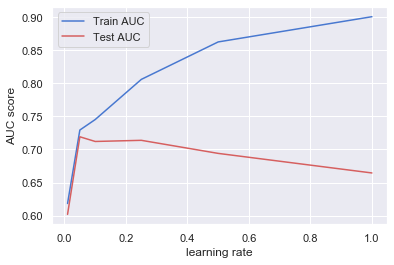

In [66]:
from sklearn.metrics import roc_curve, auc

# learning_rates deduit la contribution de chaque arbre de learning_rate.

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []


for eta in learning_rates:
    
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
    
    
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2 = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()


learning_rate = 0.1


Nous voyons que l'utilisation des learning_rates élevé entraîne un surapprentissage. 
Pour ces données, un taux d'apprentissage de 0,1 est optimal.

- Analyse n_estimators parameter de GradientBoostingClassifier

n_estimators représente le nombre d'arbres dans la forêt. 
Habituellement, plus le nombre d'arbres est élevé, mieux c'est pour apprendre les données.

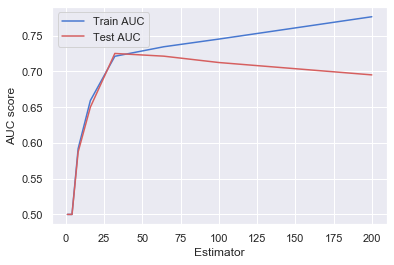

In [67]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

train_results = []
test_results = []

for estimator in n_estimators:
    
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)

   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
    
line1 = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2 = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('Estimator')
plt.show()




n_estimators = 50


L'augmentation du nombre d'estimateurs peut également entraîner un surapprentissage. 
Dans notre cas, l'utilisation de 45 arbres est optimale.

- Analyse max_depths parameter de GradientBoostingClassifier

max_depths. Cela indique à quelle profondeur l'arbre construit peut être. 
Plus l'arbre est profond, plus il est divisé et il capture plus d'informations sur la façon dont les données.

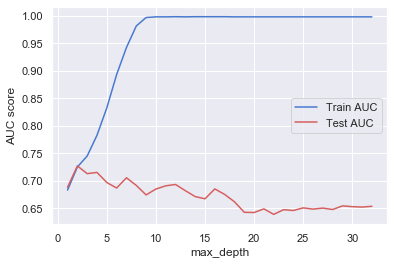

In [68]:

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)

   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
    
line1 = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2 = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()


max_depth = 2


Nous voyons que notre modèle surajuste pour les grandes valeurs de profondeur. 
L'arbre prédit parfaitement toutes les données du train, cependant, 
il ne parvient pas à généraliser les résultats pour les nouvelles données

- Analyse min_samples_split parameter de GradientBoostingClassifier

min_samples_split représente le nombre minimum d'échantillons requis pour diviser un nœud interne. 
Cela peut varier entre considérer au moins un échantillon à chaque nœud et considérer tous les échantillons à chaque nœud. 
Lorsque nous augmentons ce paramètre, l'arbre devient plus contraint car il doit considérer plus d'échantillons à chaque nœud.

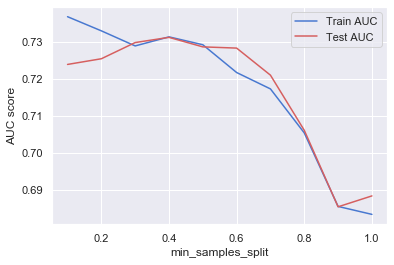

In [69]:

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)

   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
    
line1 = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2 = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.show()



min_samples_split= 0.42




Nous pouvons clairement voir que lorsque nous utilisons tous les échantillons à chaque nœud, 
le modèle ne peut pas en apprendre suffisamment sur les données. Il s'agit d'un cas de underfitting(sous-apprentissage)

- Analyse min_samples_leaf parameter de GradientBoostingClassifier

min_samples_leaf est le nombre minimum d'échantillons requis pour être sur un nœud feuille. 
Ceci est similaire à min_samples_splits, cependant, cela décrit le nombre minimum d'échantillons de sous-échantillons 
au niveau des feuilles.

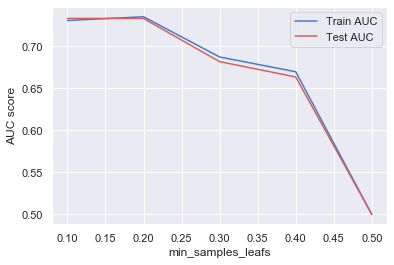

In [70]:


min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)


train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    
   model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(X_train, y_train)

   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
    
line1 = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2 = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()



min_samples_leafs = 0.2



Même conclusion que pour le paramètre précédent. L'augmentation de cette valeur peut entraîner un sous-apprentissage.

- Analyse max_features parameter de GradientBoostingClassifier


max_features représente le nombre de fonctionnalités à prendre en compte lors de la recherche de la meilleure répartition.


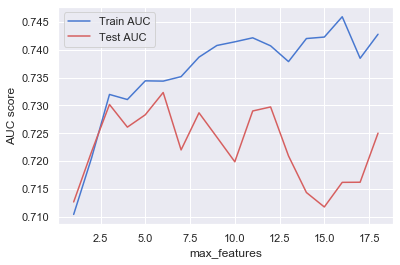

In [71]:


max_features = list(range(1,X.shape[1]))

train_results = []
test_results = []

for max_feature in max_features:
    
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(X_train, y_train)

   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
    
line1 = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2 = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()


# L'augmentation de max_features pour prendre en compte toutes les caractéristiques entraîne un surapprentissage dans ce cas. 
# L'utilisation de max_features = 6 semble nous donner des performances optimales.




In [73]:
max_features = 6

L'augmentation de max_features pour prendre en compte toutes les caractéristiques entraîne un surapprentissage dans ce cas.

L'utilisation de max_features = 6 semble nous donner des performances optimales.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [75]:
# On instancie le modele avec les parametres que nous donne des performances optimales

gb = GradientBoostingClassifier(max_depth=2, max_features=8, min_samples_leaf=0.2,
                           min_samples_split=0.42, n_estimators=50 )

gb

GradientBoostingClassifier(max_depth=2, max_features=8, min_samples_leaf=0.2,
                           min_samples_split=0.42, n_estimators=50)

In [76]:
pca = PCA(n_components = 12) # 12 composantes comme on a trouvé avant

pipe_gradientboosting=Pipeline(steps=[('preprocessor', preprocessor),
                      ('pca', pca),
                      ('gb', gb)])

In [77]:
pipe_gradientboosting.steps

[('preprocessor', ColumnTransformer(transformers=[('num',
                                   Pipeline(steps=[('scaler', StandardScaler())]),
                                   ['TotalCharges', 'MonthlyCharges', 'tenure']),
                                  ('cat',
                                   OneHotEncoder(drop='first',
                                                 handle_unknown='ignore'),
                                   ['gender', 'SeniorCitizen', 'Partner',
                                    'Dependents', 'PhoneService', 'MultipleLines',
                                    'InternetService', 'OnlineSecurity',
                                    'OnlineBackup', 'DeviceProtection',
                                    'TechSupport', 'StreamingTV',
                                    'StreamingMovies', 'Contract',
                                    'PaperlessBilling', 'PaymentMethod'])])),
 ('pca', PCA(n_components=12)),
 ('gb',
  GradientBoostingClassifier(max_depth=2, ma

In [78]:
pipe_gradientboosting.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                

In [79]:
y_pred_test = pipe_gradientboosting.predict(X_test)

print("balanced score accuracy gradientboosting clf:", balanced_accuracy_score(y_test,y_pred_test))

# Environ 71 % c'est le meilleure score avec chaque parametre optimisé  

balanced score accuracy gradientboosting clf: 0.712562624221817


###  Voici l'instruction pour réaliser l'optimisation ci-dessus, en une seule instruction.
### /!\ Mais non executée car TROP LONG!!!!!!

In [ ]:
# Gridsearch Hyperparameters tuning GB

#parameters = { 'pca__n_components' : [12],
 #   "gb__loss":["deviance"],
#    "gb__learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
 #   "gb__min_samples_split": np.linspace(0.1, 0.5, 12),
  #  "gb__min_samples_leaf": np.linspace(0.1, 0.5, 12),
   # "gb__max_depth":[3,5,8],
    #"gb__max_features":["log2","sqrt"],
   # "gb__criterion": ["friedman_mse",  "mae"],
    #"gb__subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    #"gb__n_estimators":[10]
    #}

#pipe_gradientboosting=Pipeline(steps=[('preprocessor', preprocessor),
   #                   ('pca', pca),
   #                   ('gb', GradientBoostingClassifier())])

#clf_GS = GridSearchCV(pipe_gradientboosting, parameters , n_jobs=-1, scoring='balanced_accuracy')
#clf_GS.fit(X_train,y_train)

# 

# 3) Optimisation - RandomForest  (PCA+Pipline+GridSearchCV)¶

In [80]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

pca = PCA(n_components = 12) # 12 composantes comme on a trouvé avant, on decide pour à la place de GridSearchCV
                             #car algo de randomForest, comme le gradientboosting, est exigeante en terms des calculs

hyperF = dict(rf__n_estimators = n_estimators, rf__max_depth = max_depth,  
              rf__min_samples_split = min_samples_split, 
             rf__min_samples_leaf = min_samples_leaf)

pipe_randomforest=Pipeline(steps=[('preprocessor', preprocessor),
                      ('pca', pca),
                      ('rf', RandomForestClassifier())])


gridF = GridSearchCV(pipe_randomforest, hyperF, 
                      n_jobs = -1, scoring='balanced_accuracy')

gridF.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'MonthlyCharges',
                                                                          'tenure']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['gender',
       

Les parametres du RandomForest qui donne le mellieure score balanced_accuracy sont:

In [81]:
print("Best: %f using %s" % (gridF.best_score_, gridF.best_params_)) 

Best: 0.708744 using {'rf__max_depth': 25, 'rf__min_samples_leaf': 10, 'rf__min_samples_split': 15, 'rf__n_estimators': 800}


avec une balanced accuracy d'environ 71%

# 

# 6)  Optimisation - KNeighborsClassifier  (PCA+Pipline+GridSearchCV)

In [82]:
# On fait une copie du DataSEt pour éviter de le poluer
df=init(data)

X= df.drop('Churn', axis=1)
y= df['Churn']

#X = Standardiser(X)
#X = Encoder(X)

le = LabelEncoder().fit(y) 
y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)


In [83]:
# Nous utilisons également l'analyse en composantes principales (PCA) qui réduira la dimension des variables 
# en créant de nouvelles variable qui ont la plupart de la variance des données d'origine.
# on laisse gridsearch trouver le nombre de composantes optimale qui permet d'obtenir le score meilleure(balanced_accuracy)

pca = PCA()

n_components = list(range(1,X.shape[1]+1,1)) # entre 1 et nombre des variable de X

C = np.logspace(-4, 4, 50)


In [84]:
param_grid_knn = [
  {'n_neighbors':list(range(1, 10,1)), 
   'weights': ['uniform','distance'],
   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p' : [1,2]}
 ]

pipe_knn = Pipeline(steps=[ ('preprocessor', preprocessor),
                            ('pca', pca), 
                            ('knn', KNeighborsClassifier()),
                          ])

parameters_knn = dict(pca__n_components=n_components, 
                  knn__n_neighbors = param_grid_knn[0]['n_neighbors'],
                  knn__weights = param_grid_knn[0]['weights'],
                  knn__algorithm = param_grid_knn[0]['algorithm'],
                  knn__p = param_grid_knn[0]['p'])

# ON instance notre GridSearchCV
clf_GS_knn = GridSearchCV( pipe_knn, parameters_knn, n_jobs=-1, scoring='balanced_accuracy')
clf_GS_knn

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'MonthlyCharges',
                                                                          'tenure']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['gender',
       

In [85]:
# On lance le comparatif
clf_GS_knn.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges',
                                                                          'MonthlyCharges',
                                                                          'tenure']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['gender',
       

In [86]:
print('Best n_neighbors :', clf_GS_knn.best_estimator_.get_params()['knn__n_neighbors'])
print('Best algorithm:',  clf_GS_knn.best_estimator_.get_params()['knn__algorithm'])
print('Best weights:', clf_GS_knn.best_estimator_.get_params()['knn__weights'])
print('Best p:',  clf_GS_knn.best_estimator_.get_params()['knn__p'])
print('Best pca:',  clf_GS_knn.best_estimator_.get_params()['pca__n_components'])
print("Best: %f using %s" % (clf_GS_knn.best_score_, clf_GS_knn.best_params_))

Best n_neighbors : 9
Best algorithm: kd_tree
Best weights: uniform
Best p: 2
Best pca: 19
Best: 0.706536 using {'knn__algorithm': 'kd_tree', 'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'uniform', 'pca__n_components': 19}


balanced accuracy d'environ 71%

# 

# Comparatif entre les 4 modéles optimisés 

In [208]:
# meme si pour le gradientboosting classifier on a optimisé chaque parametre pour rendre optimal le roc_auc_score
# (et pas balanced_accuracy_score)

In [209]:
df = init(data)

X= df.drop('Churn', axis=1)
y= df['Churn']

le = LabelEncoder().fit(y) 
y = le.transform(y)

In [210]:
pca_19 = PCA(n_components = 19) # 19 composantes best avec grid_search trouvé pour REGLOG et KNN
pca_12 = PCA(n_components = 12) # 12 composantes pour Random_forest et Gradient_boosting(choix de modelisation)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)


In [211]:

classifiers = [
    KNeighborsClassifier(n_neighbors=9,p=2,  weights='uniform', algorithm='kd_tree') ,
    LogisticRegression(solver="liblinear", C= 0.00021209508879201905, penalty='l2'),
    RandomForestClassifier(max_depth = 25, min_samples_leaf = 10, min_samples_split = 15, n_estimators = 800),  
    GradientBoostingClassifier(max_depth=2, max_features=8, min_samples_leaf=0.2,
                           min_samples_split=0.42, n_estimators=50)]



In [49]:
# Logging pour comparaison visuelle

log_cols=["Classifier", "Balanced Accuracy", "Log Loss","F1 Score"]
log = pd.DataFrame(columns=log_cols)

i=0


for clf in classifiers:
    
    if i in [0,1]:
        
        pipe_modele=Pipeline(steps=[('preprocessor', preprocessor),
                      ('pca', pca_19),
                      ('modele',classifiers[i])])
        
        pipe_modele.fit(X_train, y_train)
        name = clf.__class__.__name__
        
        print("="*30)
        print(name)
        
        
        
        print('****Results****')
        test_predictions = pipe_modele.predict(X_test) # calcul des predictions sur le jeu de test
        acc = balanced_accuracy_score(y_test, test_predictions) 
        f1 = f1_score(y_test, test_predictions)
        print("\nBalanced Accuracy: {:.4%}".format(acc))
        print("F1 Score: {}".format(f1))
    
        test_predictions = pipe_modele.predict_proba(X_test) # calcul des proba model sur le jeu de test
        ll = log_loss(y_test, test_predictions)
        print("Log Loss: {}".format(ll), "\n")
    
        log_entry = pd.DataFrame([[name, acc*100, ll,f1]], columns=log_cols)
        log = log.append(log_entry)
    
        print("="*30)
        
        i+=1
        
    else:
        
        pipe_modele=Pipeline(steps=[('preprocessor', preprocessor),
                      ('pca', pca_12),
                      ('modele',classifiers[i])])
        
        pipe_modele.fit(X_train, y_train)

        name = clf.__class__.__name__
        
        print("="*30)
        print(name)
        
        
        print('****Results****')
        test_predictions = pipe_modele.predict(X_test) # calcul des predictions sur le jeu de test
        acc = balanced_accuracy_score(y_test, test_predictions) 
        f1 = f1_score(y_test, test_predictions)
        print("\nBalanced Accuracy: {:.4%}".format(acc))
        print("F1 Score: {}".format(f1))
    
        test_predictions = pipe_modele.predict_proba(X_test) # calcul des proba model sur le jeu de test
        ll = log_loss(y_test, test_predictions)
        print("Log Loss: {}".format(ll), "\n")
    
        log_entry = pd.DataFrame([[name, acc*100, ll,f1]], columns=log_cols)
        log = log.append(log_entry)
    
        print("="*30)
        
        #print(pipe_modele)
        
        i+=1
        
        

KNeighborsClassifier
****Results****

Balanced Accuracy: 74.8102%
F1 Score: 0.7634943181818181
Log Loss: 1.0567732890109895 

LogisticRegression
****Results****

Balanced Accuracy: 73.6816%
F1 Score: 0.7404637247569186
Log Loss: 0.6042367269829476 

RandomForestClassifier
****Results****

Balanced Accuracy: 80.9381%
F1 Score: 0.8125232948192321
Log Loss: 0.4246998834665687 

GradientBoostingClassifier
****Results****

Balanced Accuracy: 75.3704%
F1 Score: 0.7533257316609654
Log Loss: 0.5059925485963946 



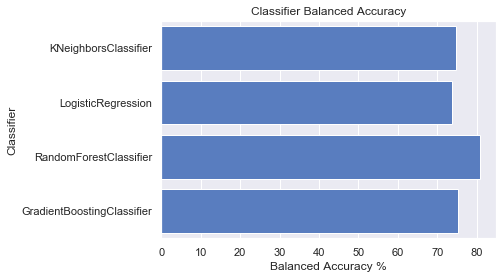

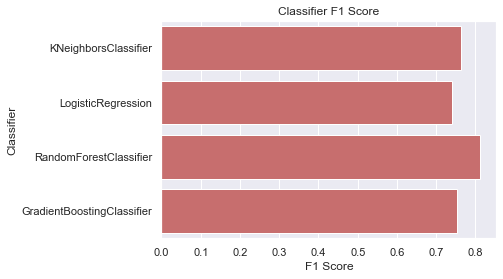

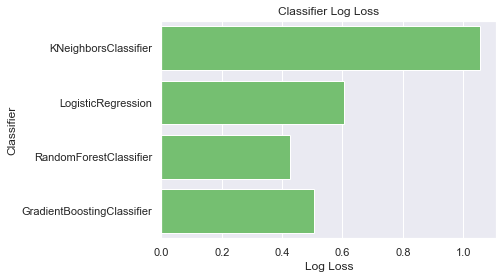

In [50]:
sns.set_color_codes("muted")
sns.barplot(x='Balanced Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Balanced Accuracy %')
plt.title('Classifier Balanced Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='F1 Score', y='Classifier', data=log, color="r")

plt.xlabel('F1 Score')
plt.title('Classifier F1 Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()



# Conclusion préliminaire

Après avoir tranformé notre jeu de données (standardisé nos variables numériques avec StandardScaler 
                                                  et transformé nos variables catégorielles avec OneHotEncoder 
                                                  et en appliquuant la PCA).

On a étudié 4 modeles dans le detail en cherchant à optimiser leurs paramètres pour avoir le meilleur balanced_accuracy_score.

On compare les 4 modèles avec leurs paramètres optimisés, on trouve que la **régression logistique**  est le modele plus performant si on considère le balanced_accuracy_score et f1_score.

On notera nénamoins que le **GradientBoostingClassifier** et **RandomForestClassifier** ont une Log-Loss inférieur à la regression logistique. 

# 

# Pour répondre à la question, on va : 
### - tester plusieurs pistes pour pallier au désiquilibre des classes 
 
### - et ajouter la métrique Précision 

### Piste  -  RandomOverSampler

In [60]:
df = init(data)

X= df.drop('Churn', axis=1)
y= df['Churn']


le = LabelEncoder().fit(y) 
y = le.transform(y)

In [61]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced

#oversampling 
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_ro,y_ro, test_size = 0.3, random_state=0)



In [62]:
pca_19 = PCA(n_components = 19) # 19 composantes best avec grid_search trouvé pour REGLOG et KNN
pca_12 = PCA(n_components = 12) # 12 composantes pour Random_forest et Gradient_boosting(choix de modelisation)

In [63]:

classifiers = [
    KNeighborsClassifier(n_neighbors=9,p=2,  weights='uniform', algorithm='kd_tree') ,
    LogisticRegression(solver="liblinear", C= 0.00021209508879201905, penalty='l2'),
    RandomForestClassifier(max_depth = 25, min_samples_leaf = 10, min_samples_split = 15, n_estimators = 800),  
    GradientBoostingClassifier(max_depth=2, max_features=8, min_samples_leaf=0.2,
                           min_samples_split=0.42, n_estimators=50)]


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import sensitivity_specificity_support
import joblib

filename =['KNC','LR','RFC','GBC']


# Logging pour comparaison visuelle
log_cols=["Classifier", "Balanced Accuracy", "Log Loss","F1 Score", "Precision"]
log = pd.DataFrame(columns=log_cols)

i=0

for clf in classifiers:
    
    if i in [0,1]:
                    
        pipe_modele=Pipeline(steps=[ ('preprocessor', preprocessor), 
                      ('pca', pca_19),
                      ('modele',classifiers[i])])
        
        pipe_modele.fit(X_train, y_train)
        
        joblib.dump(pipe_modele,filename[i])
        name = clf.__class__.__name__
        
        print("="*30)
        print(name)
        
        
        print('****Results****')
        test_predictions = pipe_modele.predict(X_test) # calcul des predictions sur le jeu de test
        acc = balanced_accuracy_score(y_test, test_predictions) 
        f1 = f1_score(y_test, test_predictions) 
        pr = precision_score(y_test, test_predictions) 
        ll = log_loss(y_test, test_predictions) 
        
            
        print("\nBalanced Accuracy: {:.4%}".format(acc))
        print("F1 Score: {}".format(f1))
        print("Précision: {}".format(pr))
        print("Log Loss: {}".format(ll), "\n")

        
    
        log_entry = pd.DataFrame([[name, acc*100, ll,f1, pr]], columns=log_cols)
        log = log.append(log_entry)
    
        print("="*30)
        
        i+=1
        
    else:
          
        pipe_modele=Pipeline(steps=[('preprocessor', preprocessor),
                      ('pca', pca_12),
                      ('modele',classifiers[i])])
        
        pipe_modele.fit(X_train, y_train)
        
        joblib.dump(pipe_modele,filename[i])

        name = clf.__class__.__name__
        
        print("="*30)
        print(name)
        
               
        print('****Results****')
        test_predictions = pipe_modele.predict(X_test) # calcul des predictions sur le jeu de test
        acc = balanced_accuracy_score(y_test, test_predictions) 
        f1 = f1_score(y_test, test_predictions) 
        pr = precision_score(y_test, test_predictions) 
        ll = log_loss(y_test, test_predictions) 
            
        print("\nBalanced Accuracy: {:.4%}".format(acc))
        print("F1 Score: {}".format(f1))
        print("Précision: {}".format(pr))
        print("Log Loss: {}".format(ll), "\n")
        
    
        log_entry = pd.DataFrame([[name, acc*100, ll,f1, pr]], columns=log_cols)
        log = log.append(log_entry)
    
        print("="*30)
        
        #print(pipe_modele)
        
        i+=1
       

KNeighborsClassifier
****Results****

Balanced Accuracy: 74.4800%
F1 Score: 0.7624076029567054
Précision: 0.7032467532467532
Log Loss: 8.851191906830033 

LogisticRegression
****Results****

Balanced Accuracy: 74.2479%
F1 Score: 0.7454068241469817
Précision: 0.7276720351390923
Log Loss: 8.903616789061651 

RandomForestClassifier
****Results****

Balanced Accuracy: 81.7049%
F1 Score: 0.821044831419044
Précision: 0.7925608011444921
Log Loss: 6.3335083075158 

GradientBoostingClassifier
****Results****

Balanced Accuracy: 75.9223%
F1 Score: 0.7626168224299065
Précision: 0.74235807860262
Log Loss: 8.326653784456557 



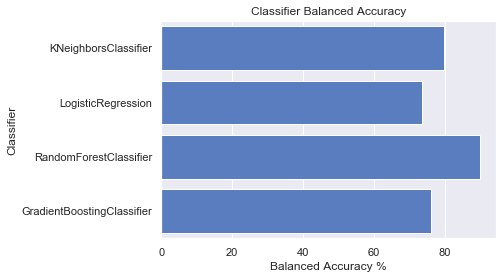

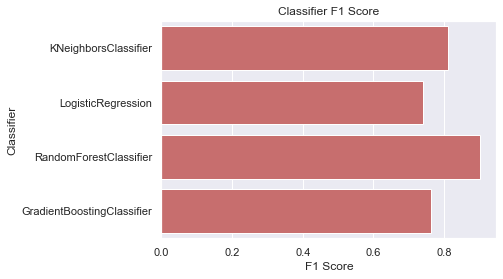

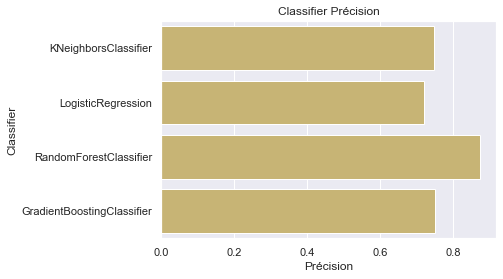

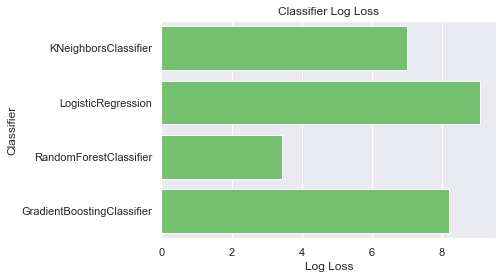

In [220]:
sns.set_color_codes("muted")
sns.barplot(x='Balanced Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Balanced Accuracy %')
plt.title('Classifier Balanced Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='F1 Score', y='Classifier', data=log, color="r")

plt.xlabel('F1 Score')
plt.title('Classifier F1 Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Precision', y='Classifier', data=log, color="y")

plt.xlabel('Précision')
plt.title('Classifier Précision')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()


# 

### Piste  -  SMOTE 

In [53]:
from imblearn.over_sampling import SMOTE


df = init(data)

X= df.drop('Churn', axis=1)
y= df['Churn']


le = LabelEncoder().fit(y) 
y = le.transform(y)

#smote 
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(preprocessor.fit_transform(X), y)

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size = 0.3, random_state=0)



In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import sensitivity_specificity_support

# Logging pour comparaison visuelle
log_cols=["Classifier", "Balanced Accuracy", "Log Loss","F1 Score", "Precision"]
log = pd.DataFrame(columns=log_cols)

i=0

for clf in classifiers:
    
    if i in [0,1]:
                    
        pipe_modele=Pipeline(steps=[ #('preprocessor', preprocessor), 
                      ('pca', pca_19),
                      ('modele',classifiers[i])])
        
        pipe_modele.fit(X_train, y_train)
        name = clf.__class__.__name__
        
        print("="*30)
        print(name)
        
        
        print('****Results****')
        test_predictions = pipe_modele.predict(X_test) # calcul des predictions sur le jeu de test
        acc = balanced_accuracy_score(y_test, test_predictions) 
        f1 = f1_score(y_test, test_predictions) 
        pr = precision_score(y_test, test_predictions) 
        ll = log_loss(y_test, test_predictions) 
        
            
        print("\nBalanced Accuracy: {:.4%}".format(acc))
        print("F1 Score: {}".format(f1))
        print("Précision: {}".format(pr))
        print("Log Loss: {}".format(ll), "\n")
      
        
    
        log_entry = pd.DataFrame([[name, acc*100, ll,f1, pr]], columns=log_cols)
        log = log.append(log_entry)
    
        print("="*30)
        
        i+=1
        
    else:
         
        pipe_modele=Pipeline(steps=[#('preprocessor', preprocessor),
                      ('pca', pca_12),
                      ('modele',classifiers[i])])
        
        pipe_modele.fit(X_train, y_train)
        name = clf.__class__.__name__
        
        print("="*30)
        print(name)
        
               
        print('****Results****')
        test_predictions = pipe_modele.predict(X_test) # calcul des predictions sur le jeu de test
        acc = balanced_accuracy_score(y_test, test_predictions) 
        f1 = f1_score(y_test, test_predictions) 
        pr = precision_score(y_test, test_predictions) 
        ll = log_loss(y_test, test_predictions) 
            
        print("\nBalanced Accuracy: {:.4%}".format(acc))
        print("F1 Score: {}".format(f1))
        print("Précision: {}".format(pr))
        print("Log Loss: {}".format(ll), "\n")

    
        log_entry = pd.DataFrame([[name, acc*100, ll,f1, pr]], columns=log_cols)
        log = log.append(log_entry)
    
        print("="*30)
        
        #print(pipe_modele)
        
        i+=1
       

KNeighborsClassifier
****Results****

Balanced Accuracy: 76.4219%
F1 Score: 0.787052810902896
Précision: 0.7068543451652387
Log Loss: 8.195565016700169 

LogisticRegression
****Results****

Balanced Accuracy: 73.9386%
F1 Score: 0.7412429378531072
Précision: 0.7267355982274741
Log Loss: 9.008517552905396 

RandomForestClassifier
****Results****

Balanced Accuracy: 79.2948%
F1 Score: 0.7947368421052632
Précision: 0.7777777777777778
Log Loss: 7.159610246790111 

GradientBoostingClassifier
****Results****

Balanced Accuracy: 75.6010%
F1 Score: 0.7561623056503602
Précision: 0.7462574850299402
Log Loss: 8.431550601919668 



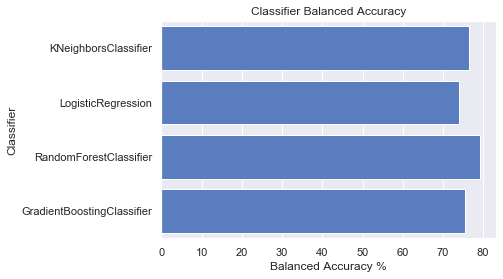

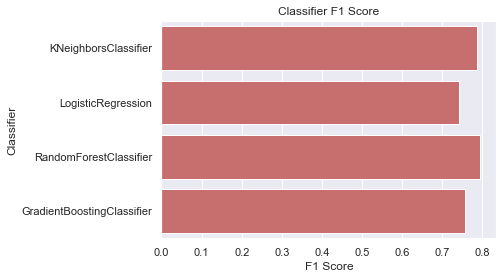

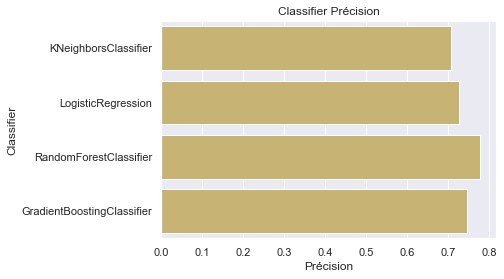

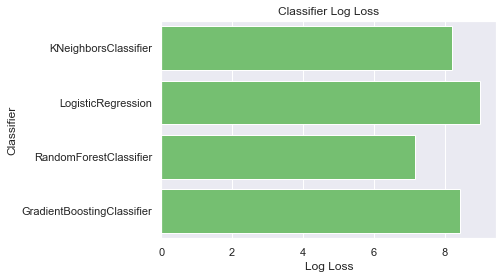

In [56]:
sns.set_color_codes("muted")
sns.barplot(x='Balanced Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Balanced Accuracy %')
plt.title('Classifier Balanced Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='F1 Score', y='Classifier', data=log, color="r")

plt.xlabel('F1 Score')
plt.title('Classifier F1 Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Precision', y='Classifier', data=log, color="y")

plt.xlabel('Précision')
plt.title('Classifier Précision')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()


# 

### Piste - le modéle : BalancedRandomForestClassifier

In [57]:
from imblearn.ensemble import BalancedRandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(preprocessor.fit_transform(X),y, test_size = 0.3, random_state=0)


bclf = BalancedRandomForestClassifier()
bclf.fit(X_train, y_train) 

y_pred = bclf.predict(X_test)


In [58]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.72      0.79      0.81      0.75      0.57      1338
          1       0.49      0.79      0.72      0.61      0.75      0.57       455

avg / total       0.80      0.74      0.77      0.76      0.75      0.57      1793



In [59]:
acc = balanced_accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
print(acc)
print(prec)

0.7555142167249791
0.4924346629986245


# 

# CONCLUSION DU PROJET 

- L'oversampling améliore la performance des 4 modéles testés (NeighborsClassifier, LogisticResgression, RandomForestClassifier, GradientBoostingClassifier)


- La méthode RandomOverSampler, donne ici de meilleurs résultats que le SMOTE.


- Quelle que soit la méthode utilisée :
      - on obtient de meilleurs scores, sauf pour le log loss.
      - le RandomForestClassifier est le modéle le plus performant, avec les scores suivants :
            - Balanced Accuracy: 81.7049%
            - F1 Score: 82.10%
            - Précision: 79.25%
            - Log Loss: 6.3335083075158  

- Enfin, nous avons creusé la piste avec un modéle BalancedRandomForestClassifier, qui s'est révélé peur probante, avec un Balanced accuracy de  75% et une précision de 49%
